##### Table of contents :
* What are features?
* Feature Engineering
* Feature Selection
* Feature Engineering v/s Feature Selection
* Feature Selection Methods
* Benefits of Feature Selection

#### What are features ...
In machine learning, features are individual independent variables that act like a input in your system. Actually, while making the predictions, models use such features to make the predictions. And using the feature engineering process, new features can also be obtained from old features in machine learning.


In [2]:
import pandas as pd
df = pd.read_csv("./breast_cancer.csv.csv")
df.head()
# here columns such as longitude, latitude are features and rows are feature vcetors

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Feature Engineering
Feature engineering is the process of using domain knowledge to extract new variables from raw data that make machine learning algorithms work.
* Human intitutive
* less research
* problem specific

#### Feature Selection
For any given dataset, many possible features can be chosen. A crucial point to consider is which features to use. 
* selection methods are available
* increase the predictive capability of ML models
* well researched domain

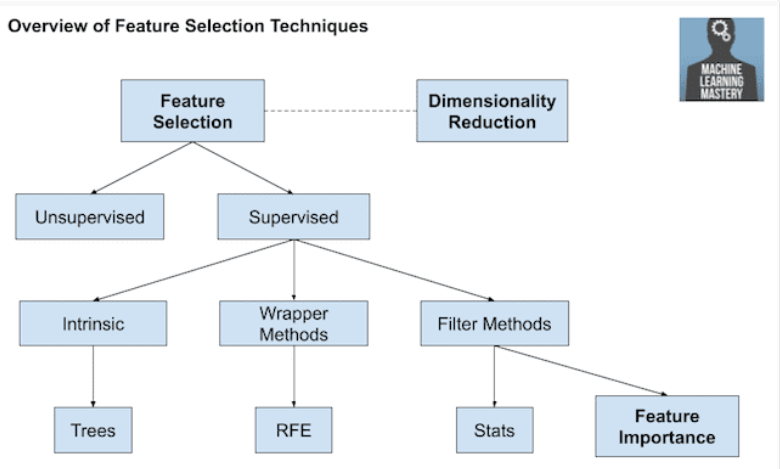

#### Supervised Feature Selection
This type of method involves examining features in conjunction with a trained model where performance can be computed. Since features are selected based on the model’s actual performance, these strategies tend to work well. However, their downside is the exorbitant amount of time they take to run.

#### Unsupervised Feature Selection
These methods perform statistical tests on features to determine which are similar or which don’t convey much information. Some, like the Variance (or CoVariance) Selector, keep an original subset of features intact, and thus are interpretable.

* example : finding the correlation

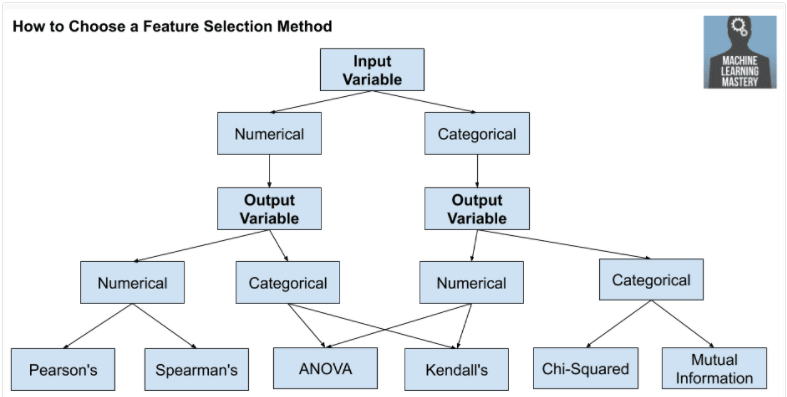

#### Helping functions and Libraries
##### The scikit-learn library provides an implementation of most of the useful statistical measures.
* Pearson’s Correlation Coefficient: f_regression()
* ANOVA: f_classif()
* Chi-Squared: chi2()
* Mutual Information: mutual_info_classif() and mutual_info_regression()
Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).

##### SelectKBest method is used to select the features based on the statistical measures

#### Feature selection when input and output both are numeric (Regression kinda problems)

In [3]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


##### Feature selection for categorical variables

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
data = pd.read_csv('./breast_cancer.csv.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
y = data['diagnosis']                   # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


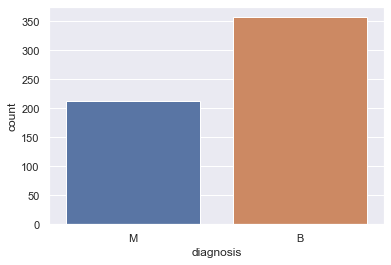

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
B, M = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [8]:
x.isnull().values.any()

False

In [9]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

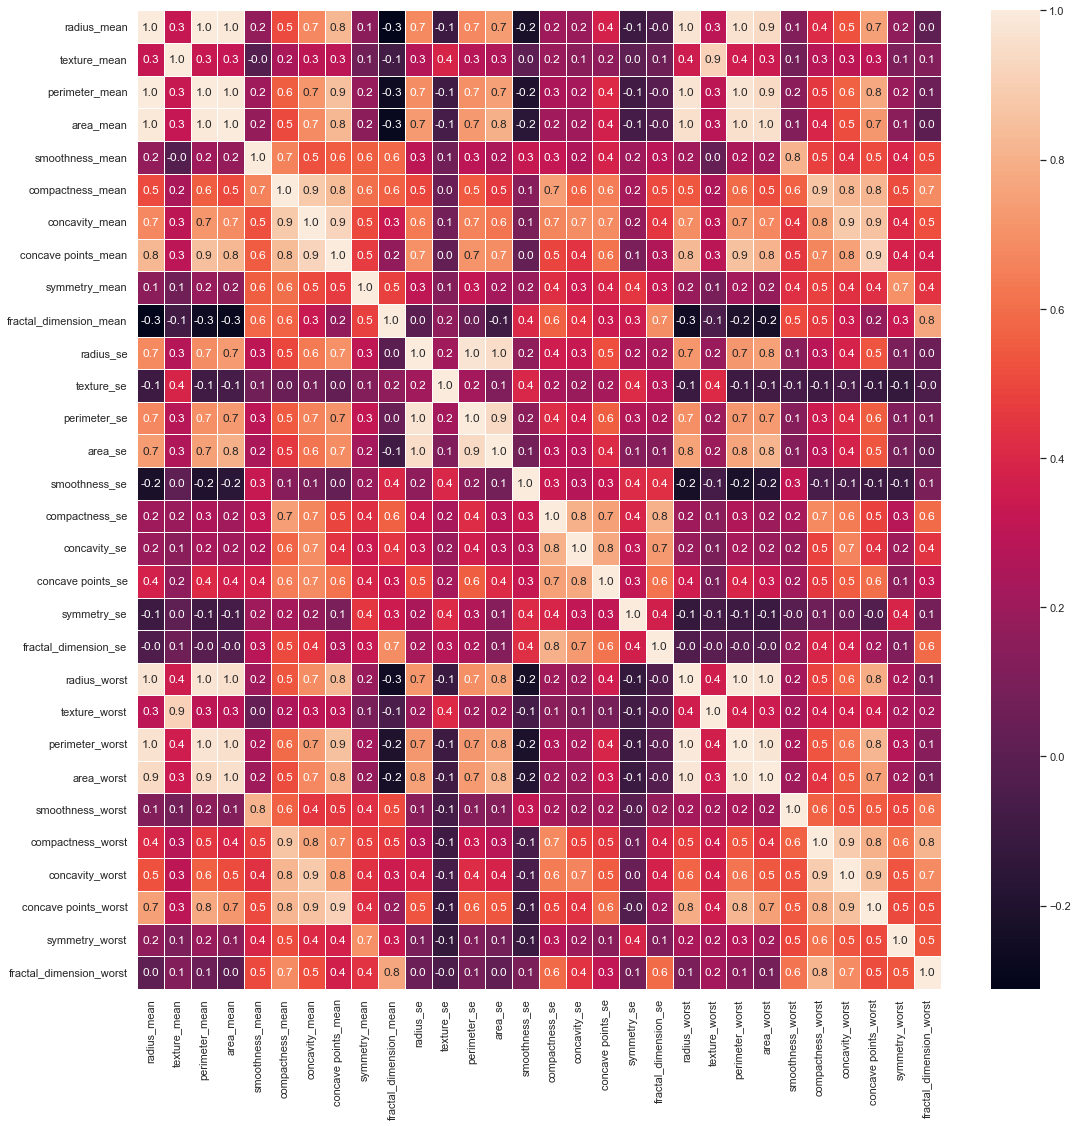

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

##### Observations from heat map
* Compactness_mean, concavity_mean and concave points_mean are correlated -> I choose concavity_mean.

* radius_se, perimeter_se and area_se are correlated -> I choose area_se.

* radius_worst, perimeter_worst and area_worst are correlated -> I choose area_worst.

* Compactness_worst, concavity_worst and concave points_worst are correlated -> I choose concavity_worst.

* Compactness_se, concavity_se and concave points_se are correlated -> I choose concavity_se.

* texture_mean and texture_worst are correlated are correlated -> I choose texture_mean.

* area_worst and area_mean are correlated -> I choose area_mean.

In [11]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


#### Using Chi-Square, T-test and Random Forest to select the features

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr
 
import matplotlib.pyplot as plt
%matplotlib inline  
 

df = pd.read_csv("./breast_cancer.csv.csv")
 
# replace M with 1 and B with 0
my_map = {
          'M':1,
          'B' :0
         }
 
df['diagnosis'] = df['diagnosis'].map(my_map)
 
# remove the id column
df.drop(['id'], axis=1, inplace=True)
 
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
my_important = []
 
for x in df.columns[1:]:
    pvalue = stats.ttest_ind(df.loc[df.diagnosis==1][x], df.loc[df.diagnosis==0][x])[1]
    if pvalue<0.05:
        my_important.append(x)
        print(f'The variable {x} is statistically significant with a pvalue = {pvalue:.2}')
    else:
        print(f'The variable {x} is NOT statistically significant')

        
# df.loc[df.diagnosis==1][x]
# df.loc[df.diagnosis==0][x]
# x

The variable radius_mean is statistically significant with a pvalue = 8.5e-96
The variable texture_mean is statistically significant with a pvalue = 4.1e-25
The variable perimeter_mean is statistically significant with a pvalue = 8.4e-101
The variable area_mean is statistically significant with a pvalue = 4.7e-88
The variable smoothness_mean is statistically significant with a pvalue = 1.1e-18
The variable compactness_mean is statistically significant with a pvalue = 3.9e-56
The variable concavity_mean is statistically significant with a pvalue = 1e-83
The variable concave points_mean is statistically significant with a pvalue = 7.1e-116
The variable symmetry_mean is statistically significant with a pvalue = 5.7e-16
The variable fractal_dimension_mean is NOT statistically significant
The variable radius_se is statistically significant with a pvalue = 9.7e-50
The variable texture_se is NOT statistically significant
The variable perimeter_se is statistically significant with a pvalue = 1

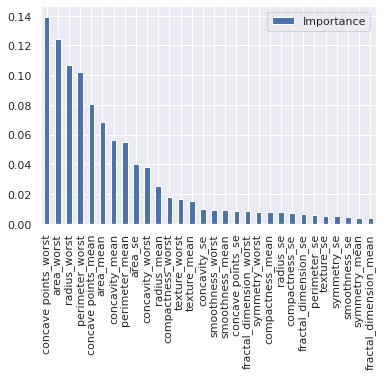

In [21]:
clf = RandomForestClassifier( n_estimators=50)
 
#X = df.drop(['diagnosis'], axis=1)
#y = df.diagnosis
 
model = clf.fit(x,y)
feat_importances = pd.DataFrame(model.feature_importances_, index=x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

In [23]:
selector = SelectKBest(score_func=chi2, k=5)
new_data = selector.fit_transform(x, y)
 
mask = selector.get_support()
new_features = x.columns[mask]
new_features

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')

#### Feature Engineering v/s Feature Selection
* When data scientists want to increase the performance of their models, feature engineering and feature selection are often the first place they look to improve. Understanding them helps significantly in virtually any data science task you take on.
* Feature engineering enables you to build more complex models than you could with only raw data. It also allows you to build interpretable models from any amount of data.Feature selection will help you limit these features to a manageable number.

#### Benefits of feature Selection
* less running time
* easy to explain (Business Development)
* filter the noise from the features
